# Machine Learning Project - Wine Classification


## 1. Introduction

En este proyecto aplicamos técnicas de aprendizaje supervisado para clasificar vinos en tres categorías en función de sus características químicas.

El objetivo es construir un modelo de clasificación multiclase capaz de predecir correctamente la clase del vino.



## 2. Dataset Overview

En esta sección cargamos el dataset y verificamos su estructura general antes de comenzar la preparación de datos.

In [257]:
# --- Librerías base ---
import numpy as np
import pandas as pd

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scikit-Learn ---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


# --- From local functions ---
import sys
sys.path.append("../src")

from functions import load_wine_data

df = load_wine_data("../data/wine.data")
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [258]:
#Asignamos nombres a las columnas

columns = [
    "class",
    "alcohol",
    "malic_acid",
    "ash",
    "alcalinity_of_ash",
    "magnesium",
    "total_phenols",
    "flavanoids",
    "nonflavanoid_phenols",
    "proanthocyanins",
    "color_intensity",
    "hue",
    "od280_od315",
    "proline"
]

df_wines.columns = columns

df_wines.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,-4,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,-4,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,-4,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,-4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,-4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [259]:
# Convertimos clases 1,2,3 en 0,1,2
df_wines["class"] = df_wines["class"] - 1

# Comprobamos
df_wines["class"].value_counts()

class
-4    71
-5    59
-3    48
Name: count, dtype: int64

In [260]:
X = df_wines.drop("class", axis=1)
y = df_wines["class"]

In [261]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  od280_od315           178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [262]:
df_wines.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,-4.061798,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,-5.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,-5.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,-4.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,-3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,-3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 3. Data Preparation

### 3.1 Data Cleaning and Validation

Verificamos que el dataset no contenga valores nulos, duplicados ni inconsistencias en los tipos de datos.

In [263]:
df_wines.isnull().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280_od315             0
proline                 0
dtype: int64

In [264]:
df_wines.duplicated().sum()

np.int64(0)

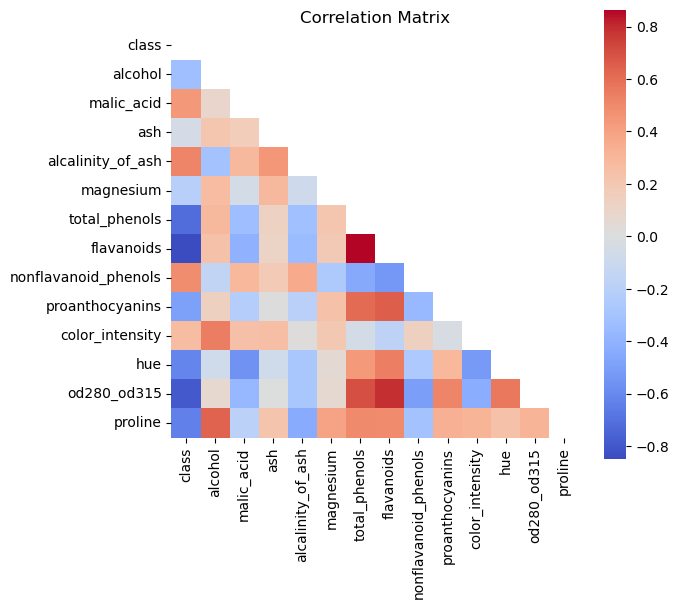

In [265]:
#Verificamos la correlación entre las características utilizando un mapa de calor (heatmap) para identificar posibles relaciones entre ellas.
corr = df_wines.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(7,7))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### 3.2 Exploratory PCA Analysis


En esta sección aplicamos Análisis de Componentes Principales (PCA) con fines exploratorios.
El objetivo es visualizar la separabilidad entre clases en un espacio reducido a dos dimensiones.
Este análisis no se utiliza para entrenar el modelo final.

La proyección en dos componentes principales muestra una separación clara entre las tres clases.
La primera componente captura la mayor parte de la varianza y permite distinguir especialmente la clase 0 del resto.
Esto sugiere que las variables químicas contienen suficiente información estructural para una clasificación efectiva.

In [266]:
scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_full)


In [267]:
print("Varianza explicada por componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

Varianza explicada por componente: [0.36198848 0.1920749 ]
Varianza total explicada: 0.5540633835693527


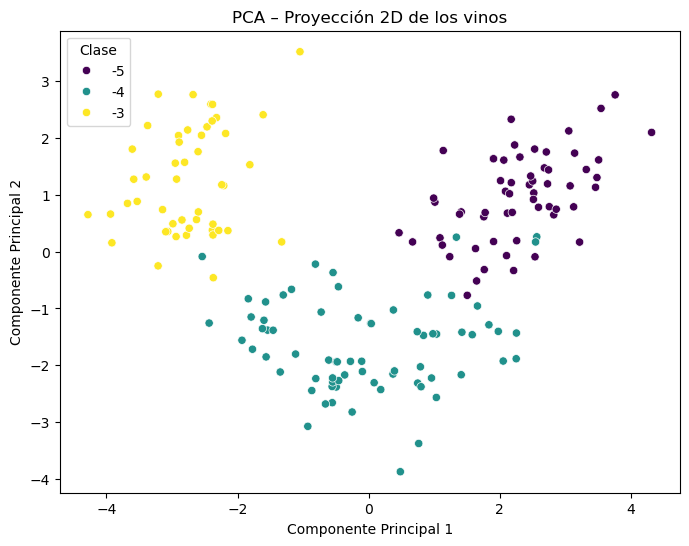

In [268]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=y,
    palette="viridis"
)

plt.title("PCA – Proyección 2D de los vinos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clase")
plt.show()

### 3.3 Train-Test Split

Dividimos el dataset en conjunto de train y test utilizando una división estratificada para mantener la proporción de clases.

In [269]:
#Dividimos el dataset en entrenamiento (80%) y test (20%), utilizando stratify=y para mantener la proporción de clases en ambos subconjuntos. Esto evita sesgos derivados de un desbalance en la variable objetivo.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

## 4. Baseline Model (KNN)
Aplicamos estandarización a las variables predictoras utilizando StandardScaler.

El ajuste del scaler se realiza únicamente sobre el conjunto de entrenamiento para evitar data leakage.

In [270]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
#Entrenamos un modelo KNN con 5 vecinos como punto de partida. Este modelo clasifica cada observación en función de las clases más cercanas en el espacio de características.
knn_wines = KNeighborsClassifier(n_neighbors=5)

knn_wines.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [272]:
#Predicciones de Y
y_pred = knn_wines.predict(X_test)

In [273]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.9722222222222222

Matriz de confusión:
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]

Reporte de clasificación:
               precision    recall  f1-score   support

          -5       1.00      1.00      1.00        12
          -4       1.00      0.93      0.96        14
          -3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



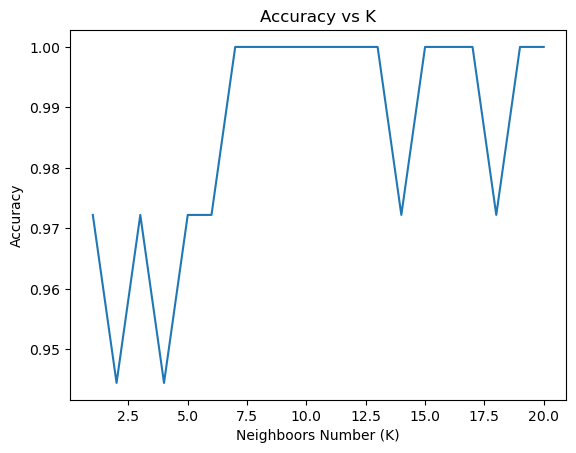

In [274]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies)
plt.xlabel("Neighboors Number (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

Al evaluar distintos valores de K entre 1 y 20, observamos que el rendimiento se estabiliza a partir de K≈7, alcanzando una accuracy del 100% en el conjunto de test. Esto sugiere que el dataset presenta una separación muy clara entre clases.
Dado que el dataset es pequeño y bien estructurado, no es extraño obtener resultados perfectos con modelos basados en distancia.

In [275]:
#Analizamos el impacto del hiperparámetro K en el rendimiento del modelo. Observamos que el accuracy se estabiliza a partir de K≈7, alcanzando incluso el 100% en el conjunto de test. Esto indica que el dataset presenta una estructura claramente separable.

In [276]:
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Mejor K encontrado: {best_k}")
print(f"Accuracy correspondiente: {best_accuracy:.4f}")

Mejor K encontrado: 7
Accuracy correspondiente: 1.0000


In [277]:
knn_final = KNeighborsClassifier(n_neighbors=7)
knn_final.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [278]:

model = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9578817733990148


In [279]:
knn_test_acc = accuracy_score(y_test, knn_final.predict(X_test))
knn_cv = cross_val_score(knn, X_train, y_train, cv=5)

## 5. Alternative Models

Tras establecer un modelo baseline con KNN, evaluamos modelos alternativos con diferentes supuestos estadísticos y niveles de complejidad.

El objetivo es comparar su capacidad de generalización utilizando tanto accuracy en test como validación cruzada.

### 5.1. Logistic Regression 

In [280]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

y_pred_log = logistic.predict(X_test)

log_test_acc = accuracy_score(y_test, y_pred_log)
log_cv = cross_val_score(logistic, X_train, y_train, cv=5)

print("Test Accuracy:", log_test_acc)
print("CV Mean Accuracy:", log_cv.mean())
print("CV Std:", log_cv.std())

Test Accuracy: 0.9722222222222222
CV Mean Accuracy: 0.9859605911330049
CV Std: 0.01719910369467594


El modelo presenta un rendimiento muy alto tanto en test como en validación cruzada, mostrando además baja variabilidad entre folds.

### 5.2 Decision Tree

El Árbol de Decisión permite capturar relaciones no lineales entre variables. 
Sin embargo, puede presentar alta varianza si no se regula adecuadamente.

In [281]:
wine_dt = DecisionTreeClassifier(random_state=42)
wine_dt.fit(X_train, y_train)

y_pred_dt = wine_dt.predict(X_test)

dt_test_acc = accuracy_score(y_test, y_pred_dt)
dt_cv = cross_val_score(wine_dt, X_train, y_train, cv=5)

print("Test Accuracy:", dt_test_acc)
print("CV Mean Accuracy:", dt_cv.mean())
print("CV Std:", dt_cv.std())

Test Accuracy: 0.9444444444444444
CV Mean Accuracy: 0.916256157635468
CV Std: 0.05135925721764876


Aunque el árbol alcanza un buen rendimiento en test, muestra mayor desviación estándar en validación cruzada, indicando menor estabilidad.

### 5.3 Random Forest

Random Forest es un modelo ensemble basado en múltiples árboles de decisión. 
Su objetivo es reducir la varianza del árbol individual y mejorar la capacidad de generalización.

In [282]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_test_acc = accuracy_score(y_test, y_pred_rf)
rf_cv = cross_val_score(rf, X_train, y_train, cv=5)

print("Test Accuracy:", rf_test_acc)
print("CV Mean Accuracy:", rf_cv.mean())
print("CV Std:", rf_cv.std())

Test Accuracy: 1.0
CV Mean Accuracy: 0.9862068965517242
CV Std: 0.027586206896551738


Random Forest muestra un rendimiento muy competitivo y menor varianza que el árbol individual, confirmando el beneficio del enfoque ensemble.

## 6. Model Comparison & Final Selection

A continuación, comparamos todos los modelos evaluados utilizando:

- Test Accuracy
- Cross-Validation Mean Accuracy
- Cross-Validation Standard Deviation
- Gap entre Test y CV

In [283]:
results = pd.DataFrame({
    "Model": [
        "KNN",
        "Logistic Regression",
        "Decision Tree",
        "Random Forest"
    ],
    "Test Accuracy": [
        knn_test_acc,
        log_test_acc,
        dt_test_acc,
        rf_test_acc
    ],
    "CV Mean Accuracy": [
        knn_cv.mean(),
        log_cv.mean(),
        dt_cv.mean(),
        rf_cv.mean()
    ],
    "CV Std": [
        knn_cv.std(),
        log_cv.std(),
        dt_cv.std(),
        rf_cv.std()
    ]
})

results["Gap (Test - CV)"] = results["Test Accuracy"] - results["CV Mean Accuracy"]

results.sort_values(by="CV Mean Accuracy", ascending=False)

,Model,Test Accuracy,CV Mean Accuracy,CV Std,Gap (Test - CV)
3,Random Forest,1.000000,0.986207,0.027586,0.013793
1,Logistic Regression,0.972222,0.985961,0.017199,-0.013738
0,KNN,1.000000,0.971921,0.025943,0.028079
2,Decision Tree,0.944444,0.916256,0.051359,0.028188


### Selection Criteria

Dado que el dataset es relativamente pequeño, priorizamos:

- Mayor accuracy promedio en validación cruzada
- Menor desviación estándar (estabilidad)
- Modelo más simple cuando el rendimiento es equivalente

Bajo estos criterios, se selecciona **Logistic Regression** como modelo final del proyecto.

## 7. Model Interpretation (Logistic Regression)

Para interpretar el modelo final, analizamos la magnitud promedio absoluta de sus coeficientes.
Dado que las variables fueron estandarizadas, esta comparación es válida.

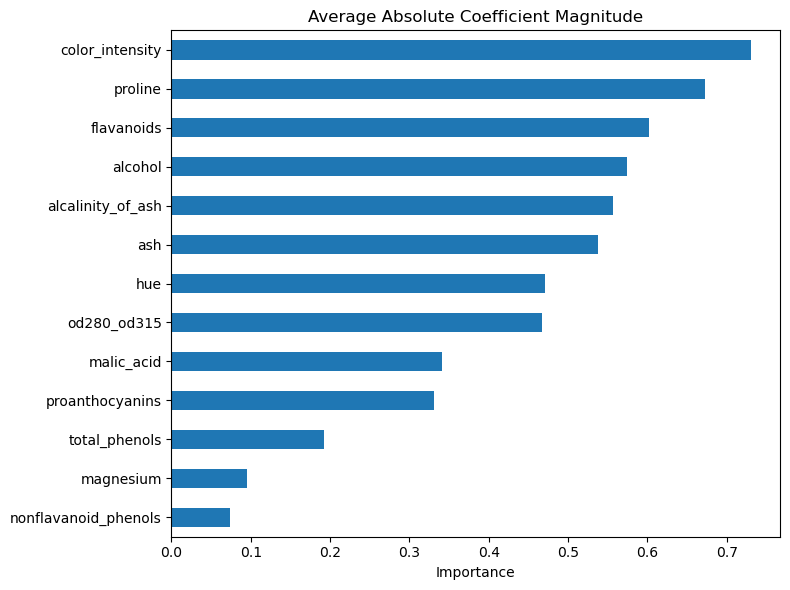

color_intensity      0.730677
proline              0.673270
flavanoids           0.602310
alcohol              0.574358
alcalinity_of_ash    0.556709
dtype: float64

In [284]:
coef_df = pd.DataFrame(
    logistic.coef_,
    columns=X.columns
)

coef_importance = coef_df.abs().mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
coef_importance.plot(kind="barh")
plt.title("Average Absolute Coefficient Magnitude")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

coef_importance.head(5)

Las variables con mayor magnitud promedio de coeficientes son las que más contribuyen a la separación entre clases en el espacio lineal aprendido por el modelo.

## 8. Final Conclusions

En este proyecto se evaluaron múltiples modelos de clasificación supervisada para predecir la clase del vino a partir de sus características químicas.

Los resultados muestran que:

- Logistic Regression y Random Forest presentan el mejor desempeño promedio.
- Logistic Regression muestra menor variabilidad.
- Decision Tree presenta mayor varianza.
- KNN funciona muy bien debido a la clara separabilidad del dataset.

Se selecciona Logistic Regression por ofrecer:

- Alto rendimiento
- Mayor estabilidad
- Menor complejidad
- Alta interpretabilidad

Dado que el dataset es pequeño y bien estructurado, los modelos simples resultan altamente competitivos. 
Con un volumen significativamente mayor de datos, podrían explorarse modelos más complejos o técnicas avanzadas de regularización.

## 9. Project Summary

En este proyecto se construyó un pipeline completo de clasificación supervisada:

- Exploración y validación del dataset
- Estandarización de variables
- Evaluación de múltiples modelos
- Validación cruzada
- Comparación estructurada
- Selección final del modelo

El modelo seleccionado fue Logistic Regression por ofrecer el mejor balance entre rendimiento, estabilidad e interpretabilidad.